# Exploratory Data Analysis (EDA)

**Iris Flower Dataset**

## Read in data

In [2]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
ds = pd.read_excel('iris.xlsx')

In [4]:
ds.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
ds.shape

(150, 5)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
ds.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [8]:
ds.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
ds.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

### Dropping the duplicate column

In [10]:
print("duplicates in dataset :" ,ds.duplicated().sum())
ds[ds.duplicated()]

duplicates in dataset : 1


,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


In [11]:
ds_updated =ds.drop_duplicates()

In [12]:
ds_updated.shape

(149, 5)

In [13]:
ds_updated.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006000,3.428000,1.462000,0.246000
Versicolor,5.936000,2.770000,4.260000,1.326000
Virginica,6.604082,2.979592,5.561224,2.028571


In [14]:
ds_updated.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     49
dtype: int64

## Explore the features using histograms

array([[<Axes: title={'center': 'sepal.length'}>,
        <Axes: title={'center': 'sepal.width'}>],
       [<Axes: title={'center': 'petal.length'}>,
        <Axes: title={'center': 'petal.width'}>]], dtype=object)

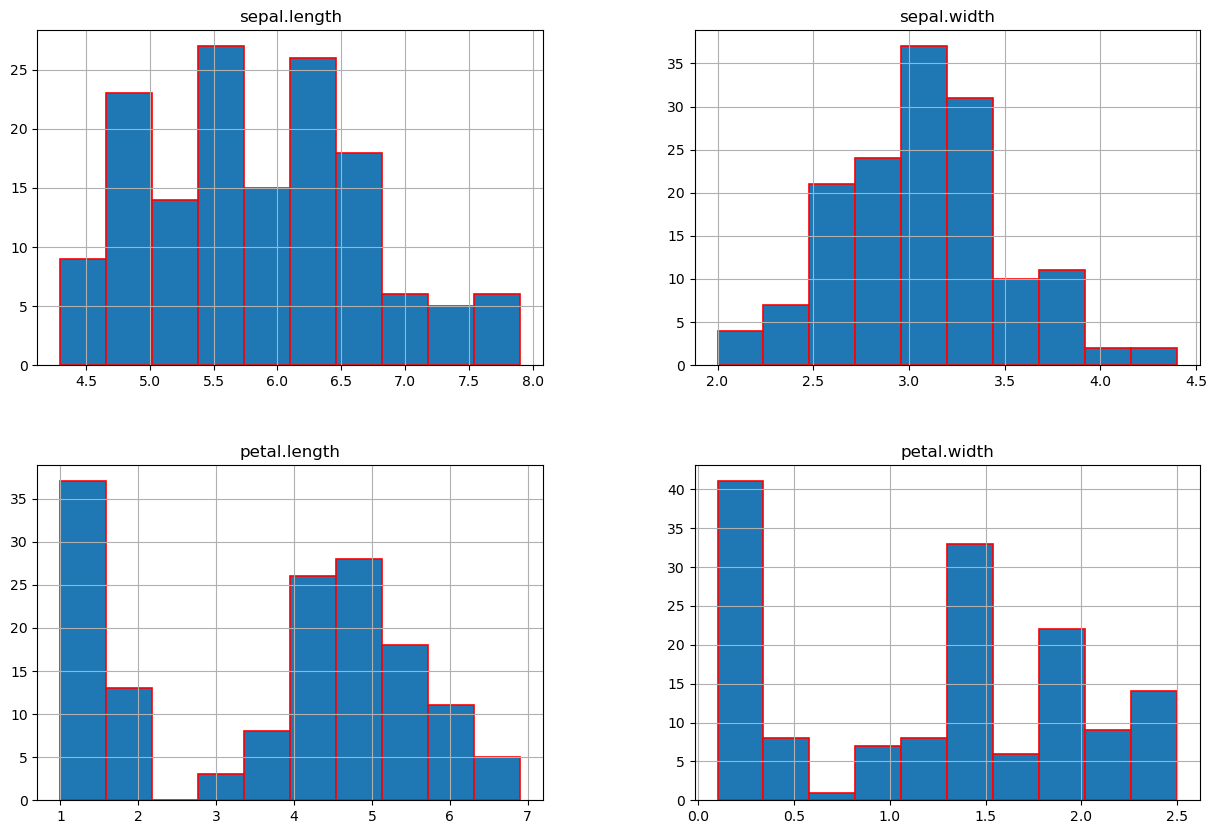

In [15]:
#Using Histogram to 
ds_updated.hist(edgecolor = 'red', linewidth=1.2, figsize=(15,10))

<Axes: >

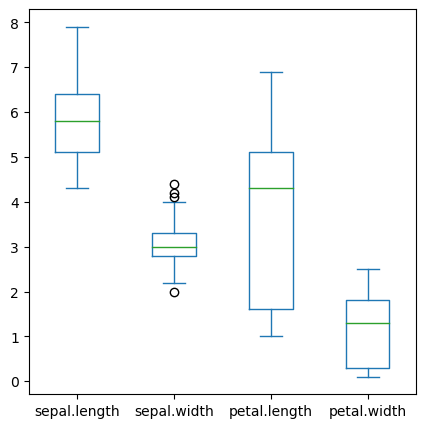

In [16]:
ds_updated.plot(kind='box' , figsize=(5,5))

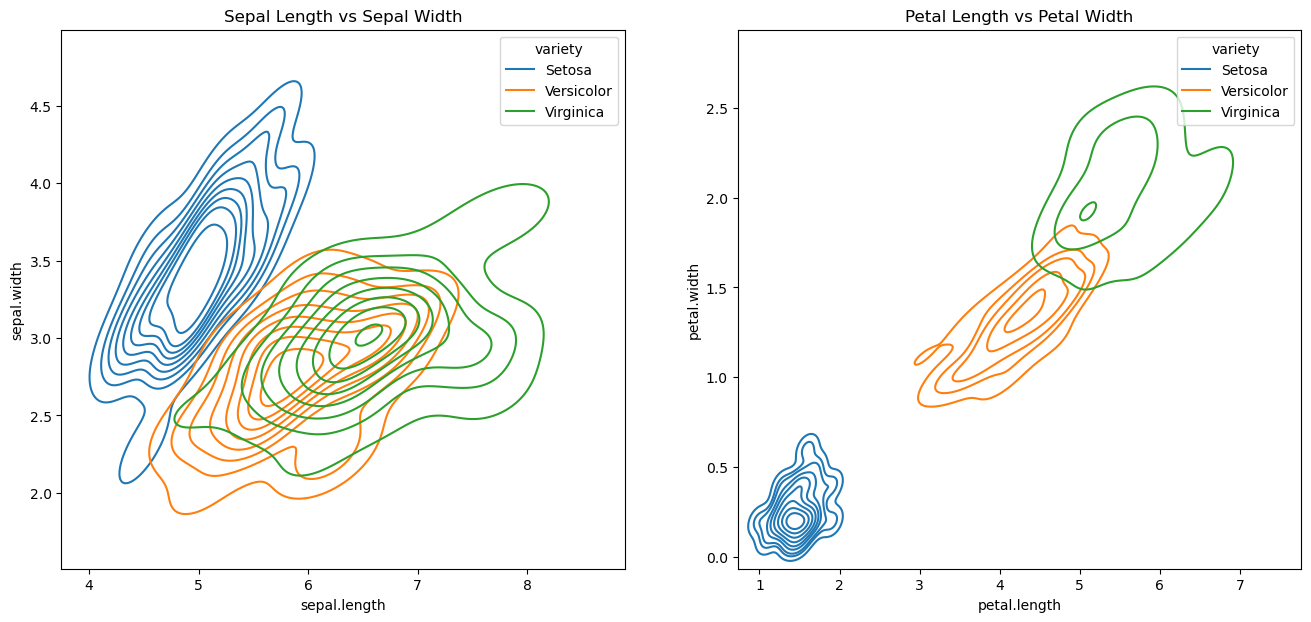

In [17]:

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 7)


snb.kdeplot(ax=axs[0], x="sepal.length", y="sepal.width", hue='variety', data=ds_updated)
axs[0].set_title("Sepal Length vs Sepal Width")

snb.kdeplot(ax=axs[1], x="petal.length", y="petal.width", hue='variety', data=ds_updated )
axs[1].set_title("Petal Length vs Petal Width")

plt.show()

From the above scatterplots following observations can be made :-
<li>1. Setose has smalled sepal length but greater width but on the other hand Versicolor has relatively average width as well as length. While Virginica has larger sepal lenght and comparitively smaller sepal widths </li>
<li>2. In the second graph we see Setosa has smallest petal length as well petal widths . While on the other hand Versicolor has average petal length and petal width and Virginica has largest petal lenght and width.
</li>

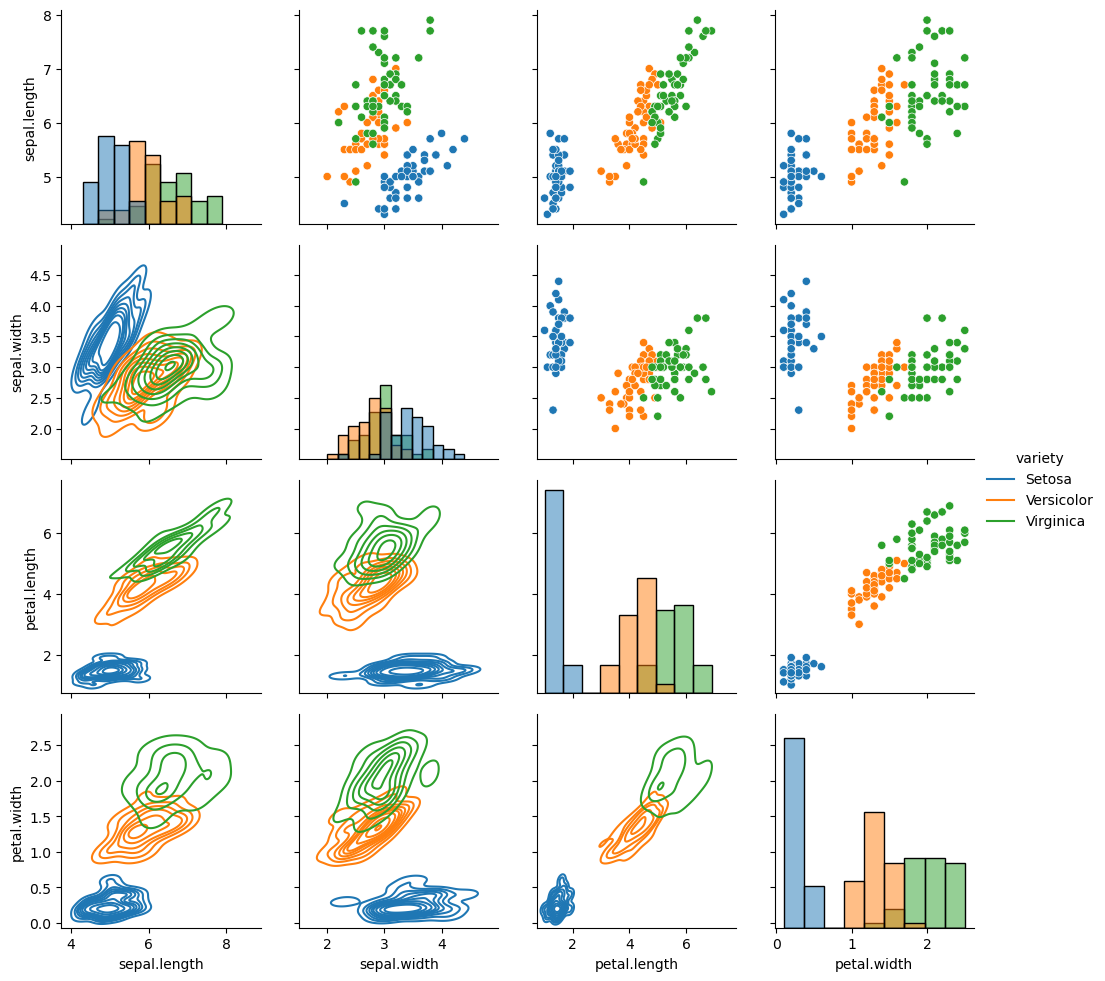

In [18]:
# Using Seaborn's PairGrid to explore bivariate relationship between features
g = snb.PairGrid(ds_updated, hue="variety")
g.map_upper(snb.scatterplot)
g.map_diag(snb.histplot)
g.map_lower(snb.kdeplot)
g.add_legend()
plt.show()

<li>Setosa species is distinct with smaller petals but higher sepal width and lower sepal length.</li>
<li>Versicolor species exhibits average dimensions in both sepals and petals.</li>
<li>Virginica species is characterized by high petal size, small sepal width, and large sepal length.</li>

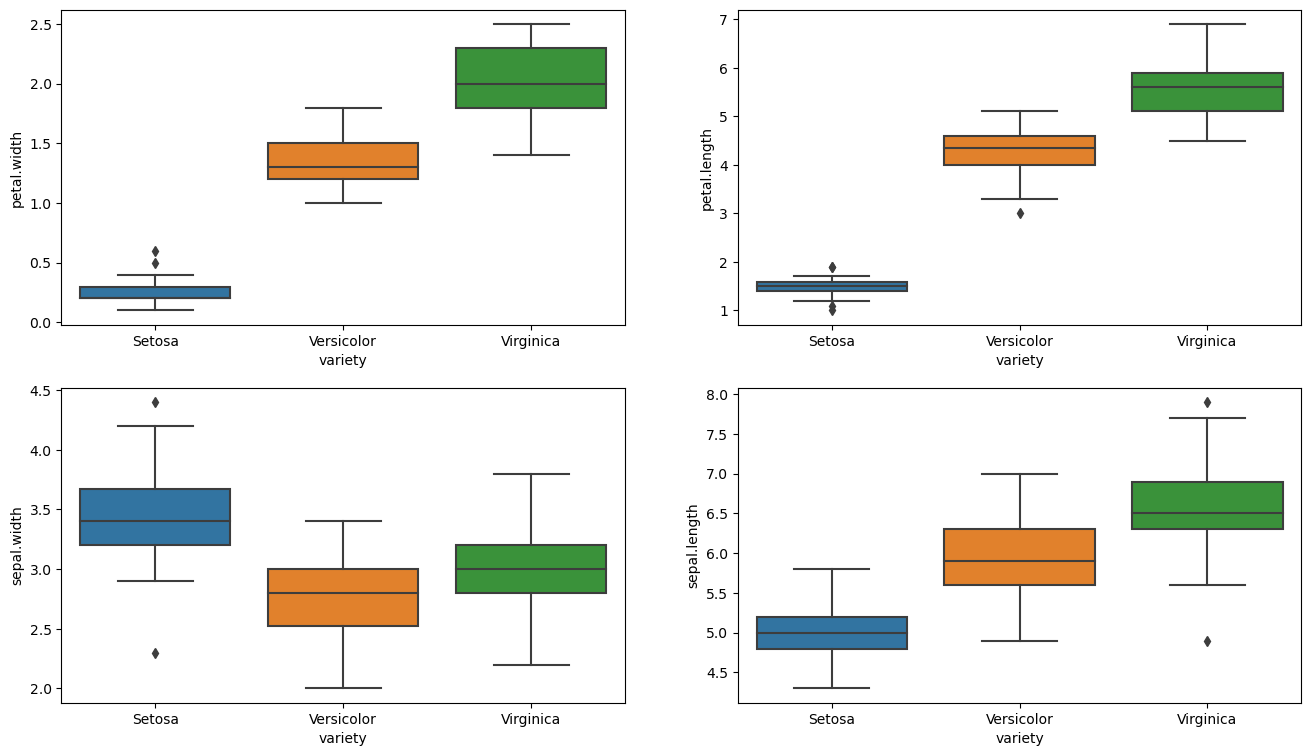

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
snb.boxplot(x="variety",y="petal.width",  data=ds_updated,  orient='v' , ax=axes[0, 0])
snb.boxplot(x="variety",y="petal.length",  data=ds_updated,  orient='v' , ax=axes[0, 1])
snb.boxplot(x="variety", y="sepal.width",  data=ds_updated,  orient='v' , ax=axes[1, 0])
snb.boxplot(x="variety", y="sepal.length",  data=ds_updated,  orient='v' , ax=axes[1, 1])
plt.show()

<li>some outliers and duplicates but since there are 150 datacells , outliers having a negligible so no need to remove them.</li>

C:\Users\semal\AppData\Local\Temp\ipykernel_21344\2445992119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  snb.heatmap(ds_updated.corr(), annot=True)


<Axes: >

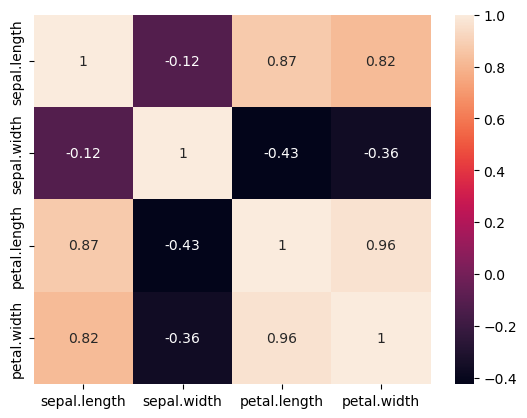

In [20]:
snb.heatmap(ds_updated.corr(), annot=True)

<li>petal_length and petal_width have a high correlation</li>
<li>petal_width and sepal_length have good correlation </li>
<li>petal_length and sepal_length have good correlations.</li>

# Encoding the target Variable

In [21]:
#Using sklearn One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ds_updated['variety_encoded'] = label_encoder.fit_transform(ds_updated['variety'])

C:\Users\semal\AppData\Local\Temp\ipykernel_21344\2611308316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_updated['variety_encoded'] = label_encoder.fit_transform(ds_updated['variety'])


In [22]:
ds_updated.head(100)

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_encoded
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor,1
96,5.7,2.9,4.2,1.3,Versicolor,1
97,6.2,2.9,4.3,1.3,Versicolor,1
98,5.1,2.5,3.0,1.1,Versicolor,1


In [23]:
ds_updated.tail(10)

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_encoded
139,6.9,3.1,5.4,2.1,Virginica,2
140,6.7,3.1,5.6,2.4,Virginica,2
141,6.9,3.1,5.1,2.3,Virginica,2
143,6.8,3.2,5.9,2.3,Virginica,2
144,6.7,3.3,5.7,2.5,Virginica,2
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2
149,5.9,3.0,5.1,1.8,Virginica,2


### Variety column is encoded , Setosa is encoded to 0 , Versicolor is encoded to 1 and Virginica to 2 

### dropping the 'variety' feature since it the target variable

In [24]:
ds_clean = ds_updated.drop('variety',axis = 1)

## Read in Data

In [25]:
import joblib
from sklearn.model_selection import train_test_split, KFold , GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from time import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [26]:
X= ds_clean.drop(columns= ['variety_encoded'])
y= ds_clean['variety_encoded']

# Splitting the dataset in 60-20-20 split ratio

In [27]:
#Splitting the data into 60% training, 20% validation, and 20% test (60-20-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (89, 4) (89,)
Validation set: (30, 4) (30,)
Testing set: (30, 4) (30,)


In [28]:
print(X.shape)

print(y.shape)

(149, 4)
(149,)


### Printing the split size

In [29]:
# Printing the 60-20-20 Split
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.6
0.2
0.2


In [30]:
def print_results(results):
    print('best parameters are : {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

#### Implement K-fold Cross validation 60-20-20 split

In [31]:
# Perform k-fold cross-validation on 60-20-20 split with LR , SVM and RF
kf_60 = KFold(n_splits=5, shuffle=True, random_state=42)

### Tunining in the Hyperparameters for LR , SVM and RF for 60-20-20 split ratio

#### Support Vector Machine

In [32]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'kernel': ['linear' , 'rbf']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1 , cv=kf_60) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_train) 
   
# print classification report 
print(classification_report(y_train, grid_predictions)) 


Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.94      0.97        31
           2       0.94      1.00      0.97        31

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



In [33]:
print_results(grid)

best parameters are : {'C': 1, 'kernel': 'linear'}

0.921 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.676 (+/-0.306) for {'C': 0.1, 'kernel': 'rbf'}
0.955 (+/-0.084) for {'C': 1, 'kernel': 'linear'}
0.933 (+/-0.109) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.044) for {'C': 10, 'kernel': 'linear'}
0.955 (+/-0.045) for {'C': 10, 'kernel': 'rbf'}
0.933 (+/-0.044) for {'C': 100, 'kernel': 'linear'}
0.933 (+/-0.044) for {'C': 100, 'kernel': 'rbf'}


In [34]:
grid.best_estimator_

SVC(C=1, kernel='linear')

##### Saving the SVM model for model comparison.

In [35]:
joblib.dump(grid.best_estimator_,'SVM_model.pkl')

['SVM_model.pkl']

#### Logistical Regression

In [36]:
#Linear Regression 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],
              'max_iter': [100, 200, 300, 500 ,1000]  
             }  
   
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1 , cv=kf_60) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_train) 
   
# print classification report 
print(classification_report(y_train, grid_predictions)) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 1, 'max_iter': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.90      0.93        31
           2       0.91      0.97      0.94        31

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.96        89



In [37]:
print_results(grid)

best parameters are : {'C': 1, 'max_iter': 100}

0.887 (+/-0.144) for {'C': 0.1, 'max_iter': 100}
0.887 (+/-0.144) for {'C': 0.1, 'max_iter': 200}
0.887 (+/-0.144) for {'C': 0.1, 'max_iter': 300}
0.887 (+/-0.144) for {'C': 0.1, 'max_iter': 500}
0.887 (+/-0.144) for {'C': 0.1, 'max_iter': 1000}
0.944 (+/-0.122) for {'C': 1, 'max_iter': 100}
0.944 (+/-0.122) for {'C': 1, 'max_iter': 200}
0.944 (+/-0.122) for {'C': 1, 'max_iter': 300}
0.944 (+/-0.122) for {'C': 1, 'max_iter': 500}
0.944 (+/-0.122) for {'C': 1, 'max_iter': 1000}
0.933 (+/-0.044) for {'C': 10, 'max_iter': 100}
0.933 (+/-0.044) for {'C': 10, 'max_iter': 200}
0.933 (+/-0.044) for {'C': 10, 'max_iter': 300}
0.933 (+/-0.044) for {'C': 10, 'max_iter': 500}
0.933 (+/-0.044) for {'C': 10, 'max_iter': 1000}
0.933 (+/-0.044) for {'C': 100, 'max_iter': 100}
0.933 (+/-0.044) for {'C': 100, 'max_iter': 200}
0.933 (+/-0.044) for {'C': 100, 'max_iter': 300}
0.933 (+/-0.044) for {'C': 100, 'max_iter': 500}
0.933 (+/-0.044) for {'C': 100, 

#### Saving the Logistical Regression model for model comparison.

In [38]:
joblib.dump(grid.best_estimator_ , 'Lr_model.pkl')

['Lr_model.pkl']

### Random Forest

In [39]:
#Random Forest

rf = RandomForestClassifier()
# defining parameter range 
param_grid = {'n_estimators': [1, 10, 25, 50 , 75, 100],  
              'max_depth': [1,3,5,7,11,13,17,23,37, None]}  
   
grid = GridSearchCV(rf, param_grid, refit = True, verbose = 3,n_jobs=-1 , cv=kf_60) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train.values.ravel()) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_train) 
   
# print classification report 
print(classification_report(y_train, grid_predictions)) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'max_depth': 3, 'n_estimators': 75}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.90      0.93        31
           2       0.91      0.97      0.94        31

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.96        89



In [40]:
print_results(grid)

best parameters are : {'max_depth': 3, 'n_estimators': 75}

0.573 (+/-0.148) for {'max_depth': 1, 'n_estimators': 1}
0.821 (+/-0.275) for {'max_depth': 1, 'n_estimators': 10}
0.91 (+/-0.152) for {'max_depth': 1, 'n_estimators': 25}
0.832 (+/-0.289) for {'max_depth': 1, 'n_estimators': 50}
0.888 (+/-0.157) for {'max_depth': 1, 'n_estimators': 75}
0.81 (+/-0.267) for {'max_depth': 1, 'n_estimators': 100}
0.888 (+/-0.122) for {'max_depth': 3, 'n_estimators': 1}
0.888 (+/-0.1) for {'max_depth': 3, 'n_estimators': 10}
0.899 (+/-0.108) for {'max_depth': 3, 'n_estimators': 25}
0.888 (+/-0.1) for {'max_depth': 3, 'n_estimators': 50}
0.933 (+/-0.109) for {'max_depth': 3, 'n_estimators': 75}
0.91 (+/-0.133) for {'max_depth': 3, 'n_estimators': 100}
0.888 (+/-0.07) for {'max_depth': 5, 'n_estimators': 1}
0.91 (+/-0.09) for {'max_depth': 5, 'n_estimators': 10}
0.91 (+/-0.088) for {'max_depth': 5, 'n_estimators': 25}
0.91 (+/-0.133) for {'max_depth': 5, 'n_estimators': 50}
0.922 (+/-0.113) for {'ma

#### Saving the Random Forest model for deployment.

In [41]:
joblib.dump(grid.best_estimator_ , 'Rf_model.pkl')

['Rf_model.pkl']

In [42]:
models = {}

for mdl in ['LR', 'SVM', 'RF', ]:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [43]:
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=3, n_estimators=75)}

## Evuluating the data on Validation and Test Set

In [44]:
def evaluate_model(name, model, X_train, y_train):
    start = time()
    pred = model.predict(X_train)
    end = time()
    accuracy = round(accuracy_score(y_train, pred ), 3)
    precision = round(precision_score(y_train, pred, average = 'macro'), 3)
    recall = round(recall_score(y_train, pred , average = 'macro' ), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [45]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 9.0ms


In [46]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, y_test)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 11.4ms


## -------------------------------------------------------------------------------------------------------------

# Splitting the dataset in 80-10-10 ratio

In [47]:
#Splitting the data into 80% training, 10% validation, and 10% test (80-10-10 split)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_80, X_val_80, y_test_80, y_val_80 = train_test_split(X_test_80, y_test_80, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set:", X_train_80.shape, y_train_80.shape)
print("Validation set:", X_val_80.shape, y_val_80.shape)
print("Testing set:", X_test_80.shape, y_test_80.shape)

Training set: (119, 4) (119,)
Validation set: (15, 4) (15,)
Testing set: (15, 4) (15,)


In [48]:
# Printing the 60-20-20 Split
for dataset in [y_train_80, y_val_80, y_test_80]:
    print(round(len(dataset) / len(y), 2))

0.8
0.1
0.1


#### Implement K-fold cross validation for 80-10-10 split

In [49]:
# Perform k-fold cross-validation on 80-10-10 split with LR and SVM
kf_80 = KFold(n_splits=5, shuffle=True, random_state=42)

### Tunining in the Hyperparameters for LR , SVM and RF for 80-10-10 split ratio

In [50]:
def print_results(results):
    print('best parameters are : {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Support Vector Machine

In [51]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'kernel': ['linear' , 'rbf']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1 , cv=kf_80) 
   
# fitting the model for grid search 
grid.fit(X_train_80, y_train_80.values.ravel()) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_train_80) 
   
# print classification report 
print(classification_report(y_train_80, grid_predictions)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        38

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.98      0.97      0.97       119



In [52]:
print_results(grid)

best parameters are : {'C': 10, 'kernel': 'rbf'}

0.95 (+/-0.162) for {'C': 0.1, 'kernel': 'linear'}
0.874 (+/-0.191) for {'C': 0.1, 'kernel': 'rbf'}
0.967 (+/-0.097) for {'C': 1, 'kernel': 'linear'}
0.958 (+/-0.167) for {'C': 1, 'kernel': 'rbf'}
0.95 (+/-0.162) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.067) for {'C': 10, 'kernel': 'rbf'}
0.958 (+/-0.129) for {'C': 100, 'kernel': 'linear'}
0.95 (+/-0.133) for {'C': 100, 'kernel': 'rbf'}


In [53]:
grid.best_estimator_

SVC(C=10)

#### Saving the SVM model for model comparison

In [54]:
joblib.dump(grid.best_estimator_ , 'SVM_model_80.pkl')

['SVM_model_80.pkl']

#### Logistical Regression

In [55]:
#Linear Regression 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],
              'max_iter': [100, 200, 300, 500 ,1000]  
             }  
   
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1 , cv=kf_80) 
   
# fitting the model for grid search 
grid.fit(X_train_80, y_train_80.values.ravel()) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_train_80) 
   
# print classification report 
print(classification_report(y_train_80, grid_predictions)) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 100, 'max_iter': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      0.98      0.98        41
           2       0.97      0.97      0.97        38

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



c:\Users\semal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
print_results(grid)

best parameters are : {'C': 100, 'max_iter': 100}

0.95 (+/-0.162) for {'C': 0.1, 'max_iter': 100}
0.95 (+/-0.162) for {'C': 0.1, 'max_iter': 200}
0.95 (+/-0.162) for {'C': 0.1, 'max_iter': 300}
0.95 (+/-0.162) for {'C': 0.1, 'max_iter': 500}
0.95 (+/-0.162) for {'C': 0.1, 'max_iter': 1000}
0.958 (+/-0.167) for {'C': 1, 'max_iter': 100}
0.958 (+/-0.167) for {'C': 1, 'max_iter': 200}
0.958 (+/-0.167) for {'C': 1, 'max_iter': 300}
0.958 (+/-0.167) for {'C': 1, 'max_iter': 500}
0.958 (+/-0.167) for {'C': 1, 'max_iter': 1000}
0.958 (+/-0.129) for {'C': 10, 'max_iter': 100}
0.958 (+/-0.129) for {'C': 10, 'max_iter': 200}
0.958 (+/-0.129) for {'C': 10, 'max_iter': 300}
0.958 (+/-0.129) for {'C': 10, 'max_iter': 500}
0.958 (+/-0.129) for {'C': 10, 'max_iter': 1000}
0.967 (+/-0.097) for {'C': 100, 'max_iter': 100}
0.958 (+/-0.129) for {'C': 100, 'max_iter': 200}
0.967 (+/-0.097) for {'C': 100, 'max_iter': 300}
0.967 (+/-0.097) for {'C': 100, 'max_iter': 500}
0.967 (+/-0.097) for {'C': 100, 'ma

#### Saving the Logistical Regression Model for model comparison

In [57]:
joblib.dump(grid.best_estimator_ , 'Lr_model_80.pkl')

['Lr_model_80.pkl']

#### Random Forest

In [58]:
#Random Forest

rf = RandomForestClassifier()
# defining parameter range 
param_grid = {'n_estimators': [1, 10, 25, 50 , 75, 100],  
              'max_depth': [1,3,5,7,9,11,13,17,23,37, None]}  
   
grid = GridSearchCV(rf, param_grid, refit = True, verbose = 3,n_jobs=-1 , cv=kf_80) 
   
# fitting the model for grid search 
grid.fit(X_train_80, y_train_80.values.ravel()) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_train_80) 
   
# print classification report 
print(classification_report(y_train_80, grid_predictions)) 

Fitting 5 folds for each of 66 candidates, totalling 330 fits


{'max_depth': 3, 'n_estimators': 25}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.95      0.94        41
           2       0.95      0.92      0.93        38

    accuracy                           0.96       119
   macro avg       0.96      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119



In [59]:
print_results(grid)

best parameters are : {'max_depth': 3, 'n_estimators': 25}

0.647 (+/-0.065) for {'max_depth': 1, 'n_estimators': 1}
0.864 (+/-0.253) for {'max_depth': 1, 'n_estimators': 10}
0.797 (+/-0.266) for {'max_depth': 1, 'n_estimators': 25}
0.925 (+/-0.178) for {'max_depth': 1, 'n_estimators': 50}
0.839 (+/-0.273) for {'max_depth': 1, 'n_estimators': 75}
0.833 (+/-0.264) for {'max_depth': 1, 'n_estimators': 100}
0.95 (+/-0.162) for {'max_depth': 3, 'n_estimators': 1}
0.958 (+/-0.167) for {'max_depth': 3, 'n_estimators': 10}
0.967 (+/-0.097) for {'max_depth': 3, 'n_estimators': 25}
0.95 (+/-0.162) for {'max_depth': 3, 'n_estimators': 50}
0.967 (+/-0.133) for {'max_depth': 3, 'n_estimators': 75}
0.95 (+/-0.162) for {'max_depth': 3, 'n_estimators': 100}
0.933 (+/-0.145) for {'max_depth': 5, 'n_estimators': 1}
0.958 (+/-0.129) for {'max_depth': 5, 'n_estimators': 10}
0.967 (+/-0.133) for {'max_depth': 5, 'n_estimators': 25}
0.95 (+/-0.162) for {'max_depth': 5, 'n_estimators': 50}
0.958 (+/-0.129) 

#### Saving the Random Forest Model for model comparison

In [60]:
joblib.dump(grid.best_estimator_ , 'Rf_model_80.pkl')

['Rf_model_80.pkl']

#### Read in the models

In [61]:
models = {}

for mdl in ['LR', 'SVM', 'RF']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [62]:
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=3, n_estimators=75)}

## Evaluating the models on Validation and Test Set

In [63]:
def evaluate_model(name, model, X_train, y_train):
    start = time()
    pred = model.predict(X_train)
    end = time()
    accuracy = round(accuracy_score(y_train, pred ), 3)
    precision = round(precision_score(y_train, pred, average = 'macro'), 3)
    recall = round(recall_score(y_train, pred , average = 'macro' ), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [64]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val_80, y_val_80)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.1ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 12.0ms


In [65]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test_80, y_test_80)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 10.0ms


## Analyzing the results on Validation set and test set and which model performed the best

<li>
In terms of Latency , in general lower latency is generally preferred in real world or time sensitive application. While performing Analysis SVM has better latency on both the validation and test sets, which indicates that it can make predictions more quickly than the other models 
</li>
<li>
In both the training and validation test sets , overfitting is surely a concern. It should be taken into account that if any updated or new is provided the models may or may not perform well as they did.
</li>
<li>
Logistic Regression is a simple linear model, SVM can be linear or use a non-linear kernel, and Random Forest is an ensemble of decision trees.In this case, Logistic Regression is the simplest model, followed by SVM, and Random Forest is the most complex.
</li>
<li>In conclusion, all models performed exceptionally well on the provided data, perhaps overfitt but again 'best' model depends on specific requirements. If low latency is a priority then SVM model is preferred. If simplicity is preferred , Logistical Regression is good choice. In this situation SVM model performed the best among the 3 models   </li>

## Comparison of the performance of modelsu sing precision, recall, accuracy, latency mentioning best proportion or split ratio of data 

<li>It seems that the models Logistic Regression, Support Vector Machine, and Random Forest perform extremely well on both the 80-10-10 and 60-20-20 split ratios simultaneously. They all achieve perfect accuracy (1.0) and perfect precision and recall (1.0) on both the validation and test sets. Additionally, the latency (execution time) is quite low for all models.</li>
<li>In my opinion and upon various tests conducted I would prefer to use 60-20-20 split as it provides statistically robust model providing a good balance between training data as well as validation and testing data size. Moreover this split ratio is particulary when there is a fair assessment of model performance is to be made.
</li>